In [1]:
#Librerias para el ejercicio 1
import os
from IPython.core.pylabtools import import_pylab
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report 
import zipfile
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import sklearn.metrics as metrics
from keras.utils.np_utils import to_categorical
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split


In [2]:
#Librerias para el ejercicio 2
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Ejercicio 1

### Análisis exploratorio y modelo de redes neuronales

In [3]:
train = pd.read_csv('./archivos/train.csv', encoding="ISO-8859-1")
test = pd.read_csv('./archivos/test.csv', encoding="ISO-8859-1")

In [4]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

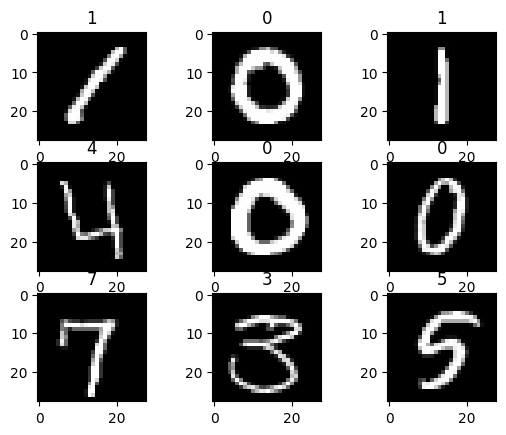

In [5]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(0, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [7]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [8]:
#centrar los datos en torno a la media cero y la varianza unitaria.
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [9]:
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [10]:
model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [11]:
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [12]:
gen = image.ImageDataGenerator()
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [13]:
history=model.fit(x=X_train,y=y_train,epochs=6,batch_size=16,validation_split=0.1,verbose=2)

Epoch 1/6
2127/2127 - 3s - loss: 0.4042 - accuracy: 0.8815 - val_loss: 0.3196 - val_accuracy: 0.9135 - 3s/epoch - 2ms/step
Epoch 2/6
2127/2127 - 4s - loss: 0.3171 - accuracy: 0.9133 - val_loss: 0.3749 - val_accuracy: 0.8987 - 4s/epoch - 2ms/step
Epoch 3/6
2127/2127 - 4s - loss: 0.3043 - accuracy: 0.9168 - val_loss: 0.3218 - val_accuracy: 0.9177 - 4s/epoch - 2ms/step
Epoch 4/6
2127/2127 - 4s - loss: 0.3000 - accuracy: 0.9198 - val_loss: 0.3241 - val_accuracy: 0.9198 - 4s/epoch - 2ms/step
Epoch 5/6
2127/2127 - 4s - loss: 0.2932 - accuracy: 0.9206 - val_loss: 0.3424 - val_accuracy: 0.9156 - 4s/epoch - 2ms/step
Epoch 6/6
2127/2127 - 4s - loss: 0.2898 - accuracy: 0.9234 - val_loss: 0.3218 - val_accuracy: 0.9249 - 4s/epoch - 2ms/step


In [14]:
ypred = model.predict(X_val,verbose=0)
y_prediction = []
for prediction in ypred:
  max_value = max(prediction)
  max_index = list(prediction).index(max_value)
  y_prediction.append(max_index)
y_prediction = np.array(y_prediction).astype('int64')
y_validation = []
for value in y_val:
  max_value = max(value)
  max_index = list(value).index(max_value)
  y_validation.append(max_index)
y_validation = np.array(y_validation).astype('int64')

In [15]:
accuracy = metrics.accuracy_score(y_validation, y_prediction)
accuracy

0.9126190476190477

In [16]:
result = confusion_matrix(y_validation, y_prediction)
result

array([[390,   0,   2,   0,   0,   4,   5,   1,   6,   0],
       [  0, 454,   2,   1,   0,   1,   1,   3,   9,   0],
       [  6,   3, 375,   6,   7,   1,   3,   6,  11,   2],
       [  1,   2,   7, 439,   0,  19,   4,   5,  22,   7],
       [  0,   0,   0,   1, 370,   0,   9,   3,   1,  13],
       [  4,   0,   2,  13,   3, 294,   9,   2,  11,   1],
       [  4,   0,   6,   0,   1,   7, 382,   0,   2,   0],
       [  1,   2,   4,   4,   7,   1,   1, 408,   4,   6],
       [  2,   6,   2,   8,   4,  12,   3,   1, 363,   2],
       [  1,   0,   3,   5,  15,   2,   1,  20,  11, 358]], dtype=int64)

### Modelo de deep learning

In [17]:
data_dir = './archivos'
os.listdir(data_dir)

['importaciones.xlsx', 'sample_submission.csv', 'test.csv', 'train.csv']

In [18]:
os.chdir(data_dir)

In [19]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [20]:
x_train = X_train.reshape(X_train.shape[0], 28, 28,1)
x_test = X_test.reshape(X_test.shape[0], 28, 28,1)
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]

In [21]:
train_data_gen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1./255)


In [22]:
modelo = Sequential()
#Agregamos la primera convolución
modelo.add(Convolution2D(128,(3,3),strides=(1,1), input_shape=(28,28,3), activation='relu'))

In [23]:
modelo.add(MaxPooling2D(pool_size=(2,2)))

In [24]:
modelo.add(Convolution2D(64,(3,3),strides=(1,1),activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

In [25]:
modelo.add(Flatten())

In [26]:
modelo.add(Dense(256,activation='relu'))

In [27]:
modelo.add(Dense(1, activation='sigmoid'))

In [28]:
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 256)              

In [29]:
modelo.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [30]:
epocas = 50
lote = 32

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=64)



In [31]:
datagen = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [32]:
H = modelo.fit(
  x = x_train,
  y = y_train,

)

ValueError: in user code:

    File "c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_1' (type Sequential).
    
    Input 0 of layer "conv2d" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (32, 28, 28, 1)
    
    Call arguments received by layer 'sequential_1' (type Sequential):
      • inputs=tf.Tensor(shape=(32, 28, 28, 1), dtype=float32)
      • training=True
      • mask=None


In [ ]:
#y_predict = modelo.predict(x_val)
len(x_test)


54

# Ejercicio 2

In [ ]:
importaciones = pd.read_excel('importaciones.xlsx', sheet_name='IMPORTACION', index_col=None, skiprows=6, nrows=269, usecols='A:AB')
importaciones['Fecha'] = pd.to_datetime(importaciones['Fecha'])
importaciones['Año'] = pd.DatetimeIndex(importaciones['Fecha']).year
importaciones['Mes'] = pd.DatetimeIndex(importaciones['Fecha']).month
importaciones.set_index('Fecha', inplace=True)
importaciones = importaciones[['Mes', 'Año', 'Gasolina superior', 'Gasolina regular', 'Diesel bajo azufre', 'Gas licuado de petróleo']]
importaciones.rename(columns = {'Gasolina superior':'Super', 'Gasolina regular':'Regular', 'Diesel bajo azufre': 'Diesel', 'Gas licuado de petróleo':'Gas licuado'}, inplace = True)
importaciones

C:\Users\anaso\AppData\Local\Temp\ipykernel_26524\115605410.py:1: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  importaciones = pd.read_excel('importaciones.xlsx', sheet_name='IMPORTACION', index_col=None, skiprows=6, nrows=269, usecols='A:AB')


,Mes,Año,Super,Regular,Diesel,Gas licuado
Fecha,,,,,,
2001-01-01,1,2001,373963.96,177776.50,0.00,194065.738095
2001-02-01,2,2001,243091.07,123115.99,0.00,170703.380952
2001-03-01,3,2001,312084.38,161726.42,0.00,161837.371429
2001-04-01,4,2001,285054.89,127338.74,0.00,163048.642857
2001-05-01,5,2001,300913.67,168730.19,0.00,171518.861905
...,...,...,...,...,...,...
2023-01-01,1,2023,578792.14,909391.13,1442099.08,497780.690000
2023-02-01,2,2023,685183.06,725101.20,1267967.39,652984.710000
2023-03-01,3,2023,633849.05,803262.67,1317519.91,711978.350000


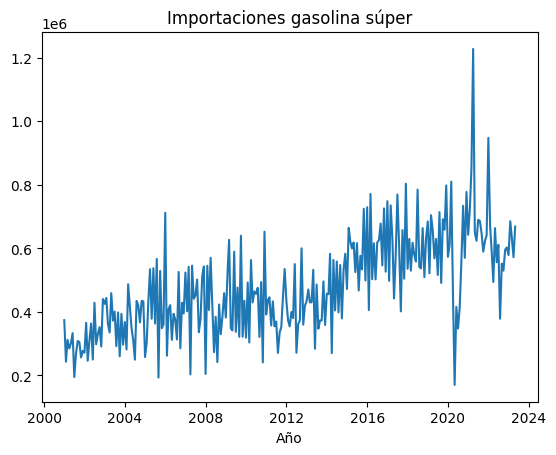

In [ ]:
super = importaciones.Super
plt.plot(super)
plt.gca().set(title="Importaciones gasolina súper", xlabel="Año")
plt.show()

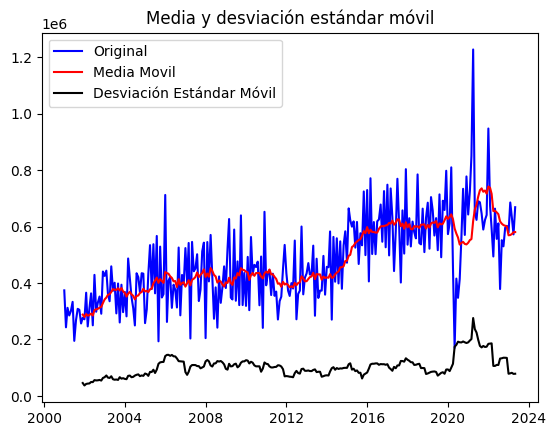

In [ ]:
# Se calcula la media móvil y la desviación estandar móvil de los últimos 12 meses.
mediaMovil = super.rolling(window=12).mean()
deMovil = super.rolling(window=12).std()
# Se grafican los resultados.
original = plt.plot(super, color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
ds = plt.plot(deMovil,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil')
plt.show(block=False)

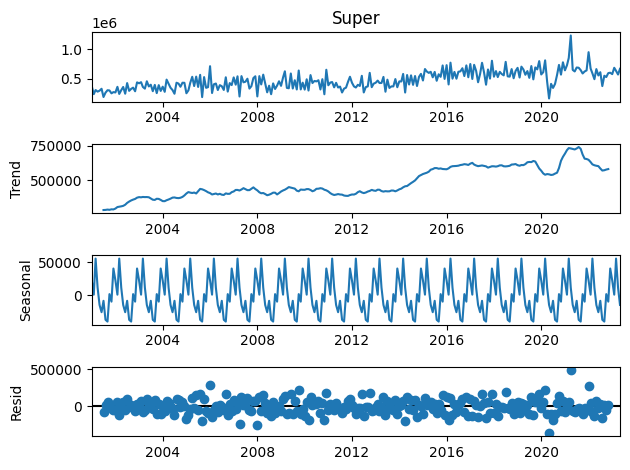

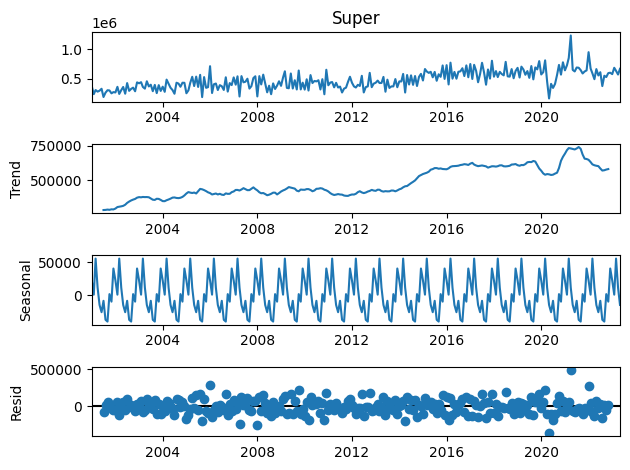

In [ ]:
descomposicion = seasonal_decompose(super)
descomposicion.plot()

In [ ]:
print('Resultados del Test de Dickey Fuller')
dfTest = adfuller(super, autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estadístico de prueba         -3.028435
p-value                        0.032323
# de retardos usados           3.000000
# de observaciones usadas    265.000000
Critical Value (1%)           -3.455270
Critical Value (5%)           -2.872509
Critical Value (10%)          -2.572615
dtype: float64


In [ ]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
ts_super_diff = super.diff()
ts_super_diff.fillna(0,inplace=True)
dfTest = adfuller(ts_super_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba       -7.605893e+00
p-value                      2.322900e-11
# de retardos usados         1.100000e+01
# de observaciones usadas    2.570000e+02
Critical Value (1%)         -3.456054e+00
Critical Value (5%)         -2.872853e+00
Critical Value (10%)        -2.572799e+00
dtype: float64


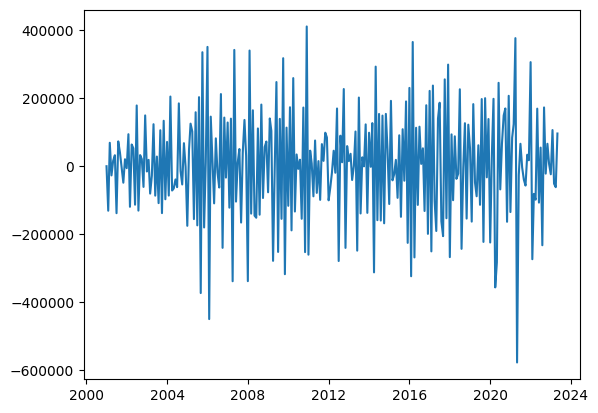

In [ ]:
plt.plot(ts_super_diff)

Como las redes neuronales trabajan mejor con datos normalizados, procedemos a normalizar.

In [ ]:
scaler = StandardScaler()
ts_super_diff=ts_super_diff.values.reshape(-1,1)
ts_super_scaled = scaler.fit_transform(ts_super_diff) 
ts_super_scaled[1:7]

array([[-0.81797429],
       [ 0.42085432],
       [-0.17432281],
       [ 0.09151111],
       [ 0.19344038],
       [-0.86305098]])

In [ ]:
entrenamiento = round(0.6*len(ts_super_scaled))
val_prueba = round(0.2*len(ts_super_scaled))
test = ts_super_scaled[(entrenamiento+val_prueba)-1:]
validation = ts_super_scaled[(entrenamiento):entrenamiento+val_prueba+1]
train = ts_super_scaled[0:entrenamiento]
train=np.insert(train,0,0)
train=np.reshape(train,(train.shape[0],1))
len(test)

55

In [ ]:
from operator import concat


def supervisada(serie,retrasos = 1):
    serie_x = []
    serie_y = []
    for i in range(len(serie)-retrasos):
        valor = serie[i:(i+retrasos),0]
        valor_sig = serie[i+retrasos,0]
        serie_x.append(valor)
        serie_y.append(valor_sig)
    return np.array(serie_x), np.array(serie_y)

x_train,y_train = supervisada(train)
x_val,y_val = supervisada(validation)
x_test,y_test = supervisada(test)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],1,1))
x_val = np.reshape(x_val, (x_val.shape[0],1,1))
x_test = np.reshape(x_test, (x_test.shape[0],1,1))
len(x_val)

54

In [ ]:
modelo1 = Sequential()
lote = 1
unidades =  1
paso = 1
caracteristicas = 1 #es univariada
modelo1.add(LSTM(lote, batch_input_shape=(lote,paso,caracteristicas),stateful=True))
modelo1.add(Dense(1))
modelo1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (1, 1)                    12        
                                                                 
 dense_5 (Dense)             (1, 1)                    2         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo1.compile(loss='mean_squared_error',optimizer="rmsprop")

In [ ]:
epocas = 50
history= modelo1.fit(
    x = x_train,
    y = y_train,
    batch_size = lote,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/50
161/161 [==============================] - 5s 9ms/step - loss: 0.9444 - val_loss: 1.1799
Epoch 2/50
161/161 [==============================] - 0s 3ms/step - loss: 0.9295 - val_loss: 1.1612
Epoch 3/50
161/161 [==============================] - 0s 3ms/step - loss: 0.9181 - val_loss: 1.1470
Epoch 4/50
161/161 [==============================] - 0s 2ms/step - loss: 0.9100 - val_loss: 1.1378
Epoch 5/50
161/161 [==============================] - 0s 2ms/step - loss: 0.9056 - val_loss: 1.1337
Epoch 6/50
161/161 [==============================] - 0s 2ms/step - loss: 0.9041 - val_loss: 1.1324
Epoch 7/50
161/161 [==============================] - 0s 2ms/step - loss: 0.9021 - val_loss: 1.1274
Epoch 8/50
161/161 [==============================] - 0s 2ms/step - loss: 0.8965 - val_loss: 1.1174
Epoch 9/50
161/161 [==============================] - 0s 2ms/step - loss: 0.8874 - val_loss: 1.1028
Epoch 10/50
161/161 [==============================] - 0s 2ms/step - loss: 0.8756 - val_loss: 1.0845

KeyboardInterrupt: 

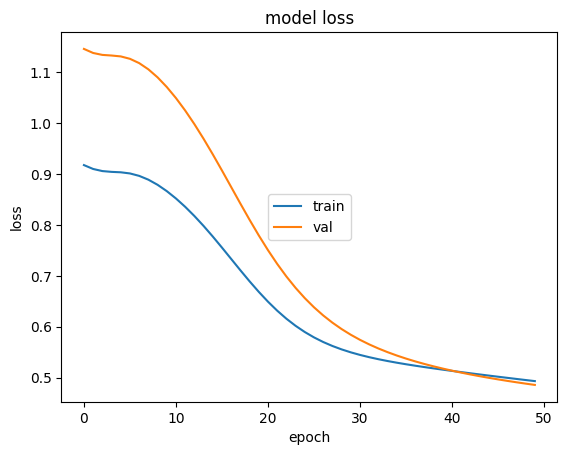

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')

In [ ]:
# Evaluación en los datos de entrenamiento
print("Pérdida en Entrenamiento")
modelo1.evaluate(
    x=x_train,
    y=y_train,
    batch_size=lote,  # Especificar el tamaño del lote utilizado en el modelo
    verbose=1
)

# Evaluación en los datos de validación
print("Pérdida en Validación")
modelo1.evaluate(
    x=x_val,
    y=y_val,
    batch_size=lote,  # Especificar el tamaño del lote utilizado en el modelo
    verbose=1
)

# Evaluación en los datos de prueba
print("Pérdida en Prueba")
modelo1.evaluate(
    x=x_test,
    y=y_test,
    batch_size=lote,  # Especificar el tamaño del lote utilizado en el modelo
    verbose=1
)

Pérdida en Entrenamiento
  1/161 [..............................] - ETA: 7s - loss: 0.1335

161/161 [==============================] - 0s 3ms/step - loss: 0.4896
Pérdida en Validación
54/54 [==============================] - 0s 3ms/step - loss: 0.4855
Pérdida en Prueba
54/54 [==============================] - 0s 3ms/step - loss: 0.9563


0.9562953114509583

In [ ]:
prediccion_val = []

def prediccion_fun(data,modelo, batch_size,scaler,dif=False,dif_cant=1, Series = np.NaN , n=1):
    prediccion = [0]* (len(data))
    i=0
    for X in data:
        X = np.reshape(X,(1,1,1))
        yhat = modelo1.predict(X, batch_size=batch_size,verbose=0)
        # invert scaling
        yhat = scaler.inverse_transform(yhat)
        if dif:
             # invert differencing
            yhat  = yhat + Series[(n+dif_cant*i)]
        # store
        prediccion[i]=yhat[0][0]
        i = i+1
    return prediccion
prediccion_val = prediccion_fun(x_val,modelo1, 1,scaler,dif=True,dif_cant=1, Series = super.values , n=entrenamiento)
prediccion_test = prediccion_fun(x_test,modelo1, 1,scaler,dif=True,dif_cant=1, Series = super.values , n=entrenamiento+val_prueba)


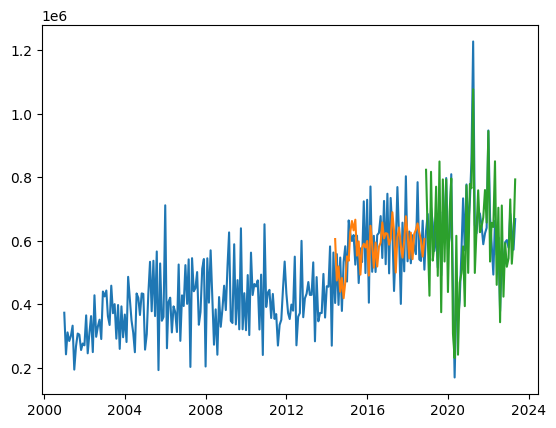

In [ ]:
df_val = pd.DataFrame(prediccion_val,index=super[(entrenamiento):entrenamiento+val_prueba].index)
df_test = pd.DataFrame(prediccion_test,index=super[entrenamiento+len(df_val):len(super)].index)


plt.plot(super)
plt.plot(df_val)
plt.plot(df_test)


### Modelo 2

In [ ]:
modelo2 = Sequential()
lote = 1
unidades =  3
paso = 1
caracteristicas = 1 #es univariada
modelo2.add(LSTM(lote, batch_input_shape=(lote,paso,caracteristicas),stateful=True))
modelo2.add(Dense(1))
modelo2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (1, 1)                    12        
                                                                 
 dense_4 (Dense)             (1, 1)                    2         
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelo2.compile(loss='mean_squared_error', optimizer="rmsprop")

In [ ]:
epocas = 50
history= modelo2.fit(
    x = x_train,
    y = y_train,
    batch_size = lote,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/50
161/161 [==============================] - 3s 6ms/step - loss: 0.8097 - val_loss: 0.9827
Epoch 2/50
161/161 [==============================] - 0s 3ms/step - loss: 0.7771 - val_loss: 0.9372
Epoch 3/50
161/161 [==============================] - 1s 3ms/step - loss: 0.7451 - val_loss: 0.8927
Epoch 4/50
161/161 [==============================] - 0s 3ms/step - loss: 0.7140 - val_loss: 0.8492
Epoch 5/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6839 - val_loss: 0.8072
Epoch 6/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6552 - val_loss: 0.7670
Epoch 7/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6284 - val_loss: 0.7292
Epoch 8/50
161/161 [==============================] - 0s 2ms/step - loss: 0.6037 - val_loss: 0.6941
Epoch 9/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5814 - val_loss: 0.6621
Epoch 10/50
161/161 [==============================] - 0s 2ms/step - loss: 0.5617 - val_loss: 0.6333

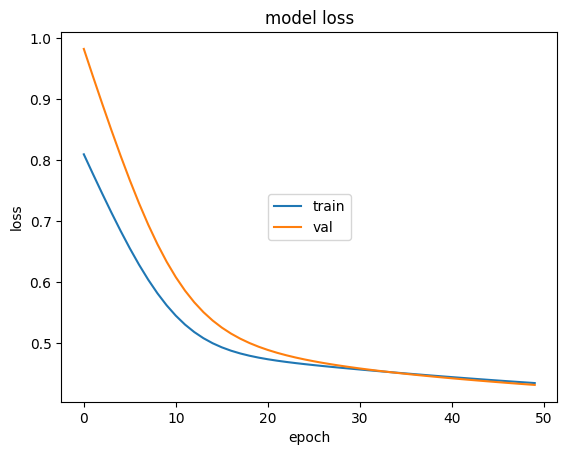

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')

In [ ]:
# Evaluación en los datos de entrenamiento
print("Pérdida en Entrenamiento")
modelo2.evaluate(
    x=x_train,
    y=y_train,
    batch_size=lote,  # Especificar el tamaño del lote utilizado en el modelo
    verbose=1
)

# Evaluación en los datos de validación
print("Pérdida en Validación")
modelo2.evaluate(
    x=x_val,
    y=y_val,
    batch_size=lote,  # Especificar el tamaño del lote utilizado en el modelo
    verbose=1
)

# Evaluación en los datos de prueba
print("Pérdida en Prueba")
modelo2.evaluate(
    x=x_test,
    y=y_test,
    batch_size=lote,  # Especificar el tamaño del lote utilizado en el modelo
    verbose=1
)

Pérdida en Entrenamiento
  1/161 [..............................] - ETA: 5s - loss: 0.1317

161/161 [==============================] - 0s 2ms/step - loss: 0.4312
Pérdida en Validación
54/54 [==============================] - 0s 2ms/step - loss: 0.4310
Pérdida en Prueba
54/54 [==============================] - 0s 2ms/step - loss: 0.9465


0.946478009223938

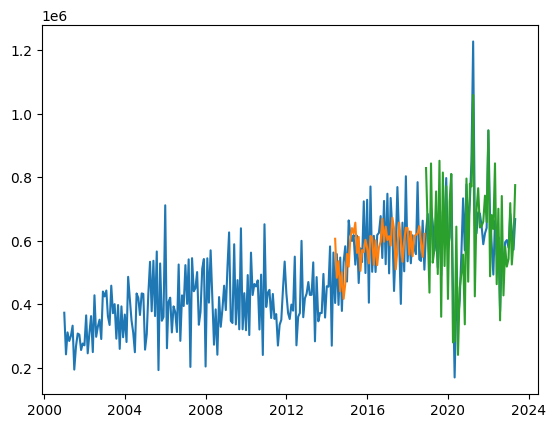

In [ ]:
prediccion_val = []

def prediccion_fun(data,modelo, batch_size,scaler,dif=False,dif_cant=1, Series = np.NaN , n=1):
    prediccion = [0]* (len(data))
    i=0
    for X in data:
        X = np.reshape(X,(1,1,1))
        yhat = modelo2.predict(X, batch_size=batch_size,verbose=0)
        # invert scaling
        yhat = scaler.inverse_transform(yhat)
        if dif:
             # invert differencing
            yhat  = yhat + Series[(n+dif_cant*i)]
        # store
        prediccion[i]=yhat[0][0]
        i = i+1
    return prediccion
prediccion_val = prediccion_fun(x_val,modelo2, 1,scaler,dif=True,dif_cant=1, Series = super.values , n=entrenamiento)
prediccion_test = prediccion_fun(x_test,modelo2, 1,scaler,dif=True,dif_cant=1, Series = super.values , n=entrenamiento+val_prueba)

df_val = pd.DataFrame(prediccion_val,index=super[(entrenamiento):entrenamiento+val_prueba].index)
df_test = pd.DataFrame(prediccion_test,index=super[entrenamiento+len(df_val):len(super)].index)


plt.plot(super)
plt.plot(df_val)
plt.plot(df_test)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3a6625f-ef6a-4d4b-9a25-c7dc0c8169d0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>